In [3]:
%pylab inline
import numpy as np 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Information Theory

일단 [information theory](http://sites.google.com/site/parthochoudhury/aMToC_CShannon.pdf)의 핵심 이론은 다음과 같습니다.

> **잘 일어나지 않는 사건 (unlinkely event)의 정보는 자주 발생할만한 사건보다 정보량이 많다(informative)**

잘 일어나지 않는 사건이라는 뜻은 확률적으로 낮은 이벤트를 말하고, 예를 들어서 로또에 당첨될 확률같이 낮은 확률을 말합니다. <br>
정보량의 원래 사용된 의미는 통신 시스템에서 bits 단위로 정보를 전달할때 그 bits 크기를 말합니다. <br>

통계학에서는 쉽게 이해하면 **불확실성 정도의 측정** 이라고 이해하면 되며, **확률적으로 낮으면 information은 증가**하고, **확률이 높다면 information은 낮아집니다**.<br>
무게를 젤때 kg이 있고, 속도를 측정할때 km/hour 같은 개념이 있듯이, 이 정보량을 측정하는 단위로 information theory에서는 entropy라는 개념으로 설명을 합니다.

* [유튜브 영상](https://youtu.be/9r7FIXEAGvs) 참고
* [Shannon Entropy, Information Gain, and Picking Balls from Buckets](https://medium.com/udacity/shannon-entropy-information-gain-and-picking-balls-from-buckets-5810d35d54b4)

보통 entropy는 열역학 그리고 통계학에서 두 가지 관점으로 정의를 내리고 설명을 하는데, <br>
해당 문서에서는 통계학적 관점에서의 entropy를 정의 내리고, Decision Tree를 설명하겠습니다.

# Entropy

확률에 대한 entropy공식은 다음과 같습니다. 

$$ I(p) = - \log_b(p) $$

* $ p $ : 는 어떤 이벤트가 일어날 확률
* $ b $ : base 
  * base 2 : bits (보통은 base 2 가 사용됩니다.)
  * base 3 : trits
  * base 10 : Hartleys
  * base e : nats


Entropy는 **불확실성 (Unpredictability)**을 나타냅니다.

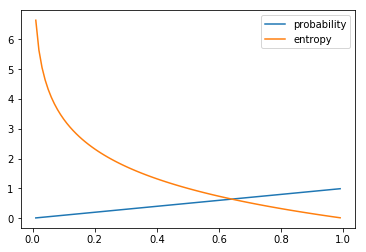

In [15]:
def entropy(p):
    return -np.log2(p)

x = np.arange(0.01, 1, 0.01)
plot(x, x, label='probability')
plot(x, entropy(x), label='entropy')
legend()

위의 그래프에서 보듯이, 확률이 낮으면 entropy는 높아지고, 확률이 높으면 entropy는 낮아지게 됩니다.

## Red and Blue Balls Example

예를 들어서 3개의 상자안에 빨간공 그리고 파란공이 상자당 4개씩 일렬로 들어 있습니다. <br>
게임의 룰은 동일한 순서로 공을 꺼내게 되면 이기는 룰이며, 꺼낸 공은 다시 상자에 집어 넣습니다. <br>
따라서 다음 공을 꺼낼때의 확률은 이전과 동일 합니다.

![Ball](images/entropy_ball.png)


Entropy는 불확실 정도를 나타내는 값이니, 첫번째 상자는 entropy가 낮고, 세번째 상자로 갈수록 entropy는 높아져야 합니다.<br>
즉 이길 확률과는 반대이며, log를 사용하면 반대로 나타내줄 수 있습니다. 

**이때 기계학습에서 매우 중요한 포인트가 있습니다!!**

$$ \log(ab) = \log(a) + \log(b) $$

확률의 곱을 계산한 뒤에 나중에 log를 연산하는게 아니라, 각각의 확률마다 log를 연산뒤 합산하는게 좋습니다.<br>
수학적으로 같은 결과를 내지만, 특히 연산량이 많은 기계학습, 딥러닝에서 곱셈을 하는 것은 합산보다 연산량이 많기 때문에, 오른쪽 부등식처럼 바꿔서 연산을 합니다. (곱셈/나눗셈은 연산을 하기 위해서 합/뺄셈을 반복적으로 사용해서 연산을 하게 됩니다. 덧셈/뺄셈: 1 cycle, 곱셈: 10 cycles, 나눗셈: 66-80 cycles [Quora 참고](https://www.quora.com/Is-there-any-performance-difference-between-the-basic-operations-sum-subtraction-multiplication-division-when-the-computer-performs-them/answer/Colin-Gordon-12))

> Logistic regression에서 likehood 계산을 log-likelihood로 바꿔서 계산하는 것과 같은 원리 입니다

entropy를 적용하여 계산하면 다음과 같습니다.

* RRRR -> $ -\log(1) -\log(1) -\log(1) -\log(1) = 0 $
* RRRB -> $ -\log(0.75) -\log(0.75) -\log(0.75) -\log(0.25) = 3.245 $
* RRBB -> $ -\log(0.5) -\log(0.5) -\log(0.5) -\log(0.5) = 4 $

![Ball](images/entropy_ball2.png)

##  Bits Example


스무고개를 한다고 가정을 합니다. 0에서부터 1023까지의 숫자중에서 제가 생각하고 있는 숫자 한개를 맞춰보라고 했을때.. 당신의 첫번째 질문은 무엇일까요?

예를 들어, "132입니까?" 라고 물어볼수도 있고, "0에서 100사이의 숫자입니까?" 라고 물어볼수도 있을 것입니다. <br>
하지만 "0에서 511사이의 숫자입니까?"처럼 남아있는 옵션을 절반으로 줄이는 질문이 좋은 질문일 것 입니다. <br>
위의 질문의 경우 {0, ..., 511} 그리고 {512, ..., 1023} 으로 나누며, 어떤 선택을 하든지, 512개의 가능한 값들이 **둘로** 나뉘게 됩니다.

Information Theory에서는 512처럼 남아있는 값을 일종의 **정보**로 보며, entropy라는 컨셉으로 이해를 하게 됩니다.<br>
Entropy는 아주 쉽게 이해했을때, **남아있는 정보의 양**으로 생각하면 쉬우며, 복잡하면 복잡할수록 entropy는 높아지고, 쉽고 명료하다면.. entropy의 양은 줄어들 것 입니다.

숫자로 이해를 해보고자 한다면, 1024를 1빼줘서 bits를 구합니다. (bits로 표현시 0에서부터 시작했을때 0~1023은 1024개와 동일합니다.) 
bits(1023)의 경우 `1111111111`  bit로 표현 될 수 있으며, 10자리의 bits로 구성되어 있기 때문에, 최대 10번의 질문을 해야지만 찾고자 하는 답을 얻을 수가 있게 된다는 뜻이 됩니다. (4는 `bits(3) = 11` 로서 2번 질문이 필요하고, 7의 경우 `bits(6) = 110` 으로서 3번의 질문이 필요합니다.).
다시말하자면, $ \log_2 $ 로 표현이 가능합니다.

| Information | function   | bits       | log_2            | N questions   |
|:------------|:-----------|:-----------|:-----------------|:--------------|
| 1024        | bits(1023) | 1111111111 | $ \log_2 $ 1024 | 10 번 질문 필요 | 
| 512         | bits(511)  | 111111111  | $ \log_2 $ 512  | 9 번 질문 필요  | 
| 256         | bits(255)  | 11111111   | $ \log_2 $ 256  | 8 번 질문 필요  |
| 128         | bits(127)  | 1111111    | $ \log_2 $ 128  | 7 번 질문 필요  |
| 64          | bits(63)   | 111111     | $ \log_2 $ 64   | 6 번 질문 필요  |
| 32          | bits(31)   | 11111      | $ \log_2 $ 32   | 5 번 질문 필요  |
| 16          | bits(15)   | 1111       | $ \log_2 $ 16   | 4 번 질문 필요  |
| 8           | bits(7)    | 111        | $ \log_2 $ 8    | 3 번 질문 필요  |
| 4           | bits(3)    | 11         | $ \log_2 $ 4    | 2 번 질문 필요  |
| 2           | bits(1)    | 1          | $ \log_2 $ 2    | 1 번 질문 필요  |


> 물론 0에서 1023의 숫자중에서 첫번째 질문을 `60인가요?`라고 물어봐서 한방에 맞춰버릴수도 있습니다.<br>
> 하지만 이경우 남아있는 정보량을 1023개로 만듬으로서 $ \log_2(1023) = 9.998 $ 로서 질문을 해야 할 횟수를 늘려버리게 됩니다.

결론적으로 Information이란 **우리가 알아내려는 답을 알기까지 필요한 정보의 양 또는 불확실성**이라고 볼 수 있습니다. <br>
예를 들어서 최초 1024에서 답을 알아낼때까지 필요한 정보는 $ \log_2(1024) = 10 $ 이며, <br>
만약 "답이 23인가요?" 처럼 한개를 물어봤을때는 $ \log_2(1023) = 9.99859 $ 가 됩니다. ( $ 1024-1 = 1023 $ )<br>
1~512이 사이의 숫자인가요? 라고 묻게 될 경우 $ \log_2(512) = 9 $ 가 되게 됩니다.

# Multi-Class Entropy (General Entropy or Cross Entropy)

위에서 2개의 classes가 존재한다는 가정하에서 설명을 했습니다.<br>
여기에서부터는 다수의 classes가 존재하는 entropy를 설명하겠습니다. (사실 아래의 공식이 일반적인 entropy공식 입니다.)


$$ I_H(t) = E \left[ I(x) \right] = - E \left[ \log_2 p_i \right] = -\sum^c_{i=1} p_i \log_2 p_i $$

모든 샘플들이 동일한 하나의 class로 분류된다면(homogeneous), entropy의 값은 0이 되며, <br>
만약 샘플의 모든 클래스가 동일하게 나뉘어진다면, entropy값은 1이 됩니다.

> 참고로 Scipy의 Decision Tree에서 entropy 는 $ \log_2 $ 를 사용합니다. <br>
> 이유는 binary tree를 사용하기 때문. <br>
> 하지만 Deep learning에서 cross entropy를 사용할때는 natural log를 사용합니다. 

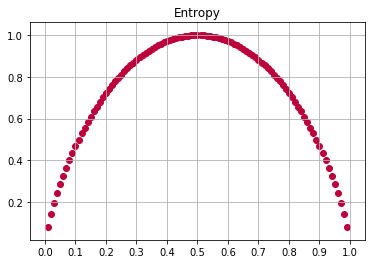

In [20]:
def entropy(p):
    # 아래 연산에서는 2개의 클래스가 존재할때 cross entropy를 사용한 예제 입니다.
    # 2개의 클래스를 갖고 있기 때문에 일어날 확률 그리고 일어나지 않을 확률.. 즉 binary classification입니다.
    return -(p*np.log2(p) + (1-p)*np.log2(1-p))

x = np.arange(0.01, 1, 0.01)
y = entropy(x)

xticks(np.arange(0, 1.1, 0.1))
grid()
title('Entropy')
scatter(x, y, color='#BB003C')

## Example

각 상자마다 다양한 구슬들이 들어 있습니다. <br>
이때 각 상자마다의 entropy를 계산해 보겠습니다.

![Box](images/entropy-box-balls.png)



$$ \begin{align} 
I_H(\text{Box A}) &= - \frac{8}{8} \log_2 \left( \frac{8}{8} \right) = 0. \\
I_H(\text{Box B}) &= - \left[ \frac{4}{8} \log_2 \left( \frac{4}{8} \right) + 
    \frac{2}{8} \log_2 \left( \frac{2}{8} \right) + 
    \frac{2}{8} \log_2 \left( \frac{2}{8} \right) \right] = 1.75 \\
I_H(\text{Box C}) &= - \left[ \frac{2}{8} \log_2 \left( \frac{2}{8} \right) + 
    \frac{2}{8} \log_2 \left( \frac{2}{8} \right) + 
    \frac{2}{8} \log_2 \left( \frac{2}{8} \right) \right] = 2.0
\end{align} $$

여기서 entropy의 의미는 만약 여기에서 공을 하나 선택했을때.. 선택한 공이 무엇인지 알아내는데 필요한 질문의 갯수라고 생각해 볼 수 있습니다.<br>
상자 A에서는 모두 빨간색 구슬이라는 것을 알고 있기 때문에, 질문이 필요하지 않습니다. 따라서 entropy는 0입니다. <br>

상자 B와 C의 경우, 둘의 차이점은 class의 갯수 (빨간색, 파란색, 노란색, 초록색)는 동일하지만, 분포도가 다릅니다.<br>
트리 구조에서 다음과 같이 질문을 하면 효율적으로 답을 얻어낼수 있습니다.

![Box](images/entropy-box-tree.png)

위와 같이 트리구조를 만들고 질문을 던진다면, 평균적인 질문의 갯수는 다음과 같습니다.

$$ \begin{align} P(\text{평균 질문 갯수}) &=  E\left[ \text{질문 횟수} \right] \\
P(\text{평균 질문 갯수} = B) &=  \frac{1}{2} * 1 + \frac{1}{4} * 2 + \frac{1}{8} * 3 + \frac{1}{8} * 3 =  1.75 \\
P(\text{평균 질문 갯수} = C) &=  \frac{1}{4} * 2 + \frac{1}{4} * 2 + \frac{1}{4} * 2 + \frac{1}{4} * 2  =  2.
\end{align} $$

# Decision Tree

위에서 Entropy, Gini Imputation 그리고 Classification Error 를 살펴보았습니다.<br>
Decision Tree는 impurity measurement를 위해서 위 3개의 방법을 splitting criterion으로 사용합니다.


# Information Gain

Decision Tree에서 **maximize**해야될 objective function 으로서 

$$ IG(D_p, f) = I(D_p) - \sum^c_{j=1} \frac{N_j}{N_p} I(D_j) $$

* $ IG(D_p, f) $ : Information Gain 함수로서 maximize해야 됨 
* $ D_p $ : 부모 노드의 Dataset 
* $ D_j $ : 자식 노드의 Dataset 
* $ f $ : 나누려는 feature 
* $ I $ : Impurity measure  
* $ N_p $ : 부모노드의 전체 샘플 갯수 
* $ N_j $ : 자식노드의 전체 샘플 갯수 

위의 공식에서 보듯이, Information Gain이란 *(부모 노드의 Impurity)*와 *(자식노드 Impurity의 합)*의 차이입니다. <br>
**자식노드의 impurity가 낮을수록, Information Gain의 값은 높아집니다.**

하지만 대부분 검색효율화를 위해서 Binary Decision Tree를 주로 사용합니다. (2개의 자식노드만을 갖음)<br>
공식은 다음과 같습니다.

$$ IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{ N_{right}}{N_p} I(D_{right})  $$


# Tutorial

## Preprocessing

In [211]:
x[x == 1] += 1
x

,windy,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0.0,0,2,0,2,0,2,0
1,2.0,0,2,0,2,0,2,0
2,0.0,0,0,0,2,0,2,0
3,0.0,2,0,0,0,2,2,0
4,0.0,2,0,2,0,0,0,2
5,2.0,2,0,2,0,0,0,2
6,2.0,0,0,2,0,0,0,2
7,0.0,0,2,0,0,2,2,0
8,0.0,0,2,2,0,0,0,2
9,0.0,2,0,0,0,2,0,2


In [215]:
tennis = pd.read_csv('tennis.csv')
x = tennis.iloc[:, range(4)]
x = pd.get_dummies(x)
y = tennis[['play']]

x = x.drop('outlook_overcast', axis=1)

t = x.join(y)

display(t)
# display(t.groupby(['play', 'outlook_sunny']).size().unstack())
# display(t.groupby(['play', 'outlook_overcast']).size().unstack())
display(t.groupby(['play', 'humidity_high']).size().unstack())

,windy,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,play
0,False,0,1,0,1,0,1,0,no
1,True,0,1,0,1,0,1,0,no
2,False,0,0,0,1,0,1,0,yes
3,False,1,0,0,0,1,1,0,yes
4,False,1,0,1,0,0,0,1,yes
5,True,1,0,1,0,0,0,1,no
6,True,0,0,1,0,0,0,1,yes
7,False,0,1,0,0,1,1,0,no
8,False,0,1,1,0,0,0,1,yes
9,False,1,0,0,0,1,0,1,yes


humidity_high,0,1
play,,
no,1,4
yes,6,3


## Model

In [217]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Visualization

In [195]:
5/14*np.log2(5/14)  + 9/14*np.log2(9/14)

-0.9402859586706309

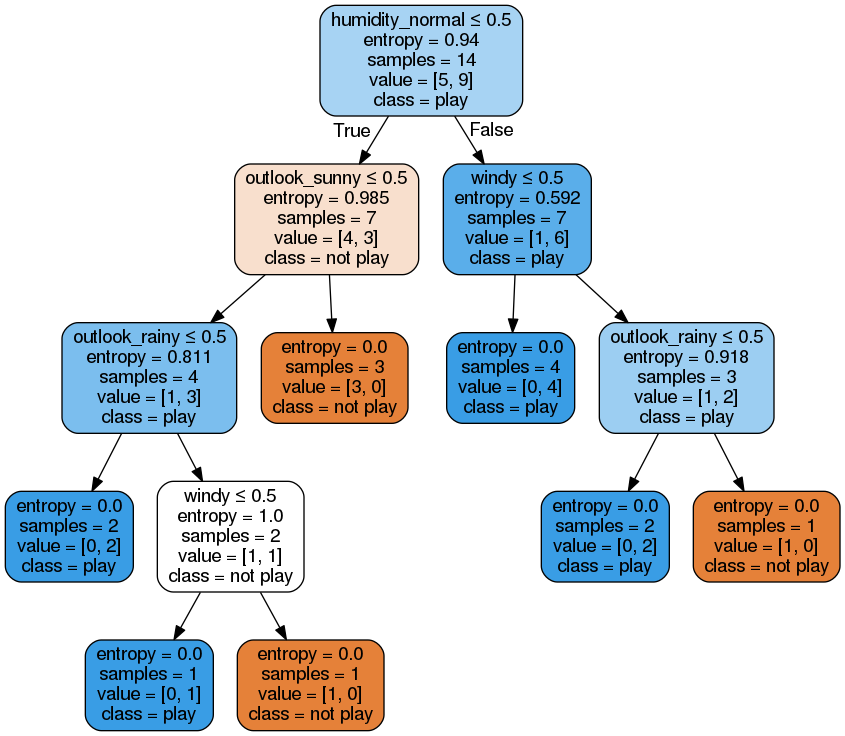

In [218]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, rounded=True,
                filled=True, 
                special_characters=True, 
                feature_names=x.columns.tolist(), 
                class_names=['not play', 'play'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Tennis Example

아래 Tennis 데이터의 outlook을 보면 다음과 같이 정리를 할 수 있습니다.

In [191]:
tennis = pd.read_csv('tennis.csv')
tennis = pd.get_dummies(tennis)
display(tennis)
display(tennis.groupby(['play_yes', 'outlook_sunny']).size().unstack())
display(tennis.groupby(['play_yes', 'outlook_overcast']).size().unstack())
display(tennis.groupby(['play_yes', 'outlook_rainy']).size().unstack())

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,play_no,play_yes
0,False,0,0,1,0,1,0,1,0,1,0
1,True,0,0,1,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0,0,1
3,False,0,1,0,0,0,1,1,0,0,1
4,False,0,1,0,1,0,0,0,1,0,1
5,True,0,1,0,1,0,0,0,1,1,0
6,True,1,0,0,1,0,0,0,1,0,1
7,False,0,0,1,0,0,1,1,0,1,0
8,False,0,0,1,1,0,0,0,1,0,1
9,False,0,1,0,0,0,1,0,1,0,1


outlook_sunny,0,1
play_yes,,
0,2,3
1,7,2


outlook_overcast,0,1
play_yes,,
0,5.0,NaN
1,5.0,4.0


outlook_rainy,0,1
play_yes,,
0,3,2
1,6,3


Outlook을 기준으로 하여 entropy를 구하면 다음과 같습니다.

$$ \begin{align} I_H (\text{outlook} = \text{sunny}) &= 
-\left[ \frac{2}{5} \cdot \log_2(\frac{2}{5}) + \frac{3}{5} \cdot \log_2(\frac{3}{5}) \right]
= 0.971 \\
I_H(\text{outlook} = \text{overcast}) &= 
-\left[ \frac{4}{4} \cdot \log_2(\frac{4}{4}) + \frac{0}{4} \cdot \log_2(\frac{0}{4}) \right]
= 0 \\
I_H(\text{outlook} = \text{rainy}) &= 
-\left[ \frac{3}{5} \cdot \log_2(\frac{3}{5}) + \frac{2}{5} \cdot \log_2(\frac{2}{5}) \right]
= 0.971
\end{align} $$



# Tutorial 2


In [82]:
from sklearn.datasets import load_iris

iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

display(x.head())
display(y)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [83]:
dt = DecisionTreeClassifier()
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

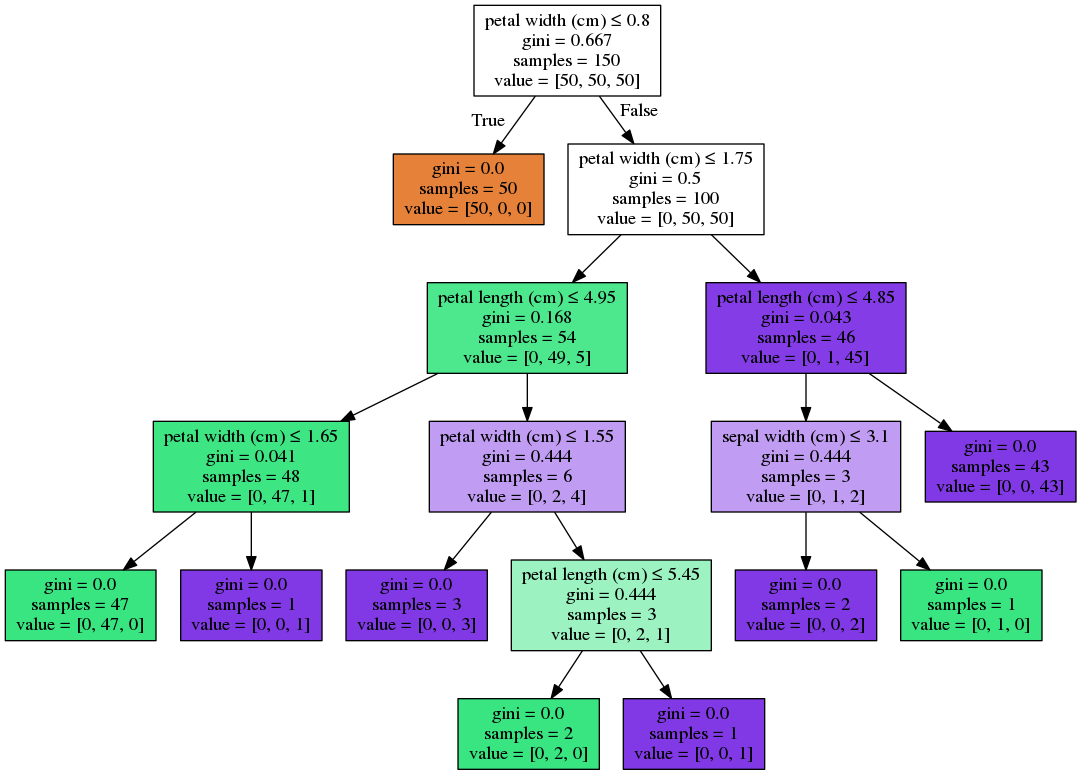

In [84]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, 
                special_characters=True, 
                feature_names=x.columns.tolist(), )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# References

* [Shannon Entropy, Information Gain, and Picking Balls from Buckets](https://medium.com/udacity/shannon-entropy-information-gain-and-picking-balls-from-buckets-5810d35d54b4)